다항회귀(Polynomial Regression)
- $y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2$ 과 같이 회귀식이 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 지칭
- 데이터 세트에 대해서 피처 X에 대해 Target Y값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음
선형 회귀와 비선형 회귀의 구분
- 선형 회귀
  - $y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2$
  - 새로운 변수인 z를 $z=[x1, x2, x1*x2, x1^2, x2^2]$로 한다면 $Y=w0+w1*z1+w2*z2+w3*z3+w4*z4+w5*z5$
- 비선형 회귀
  - $Y=w1 * \cos(X+w4) + w2*\cos(2*X+w4)+3$
  - $Y=w1*X^{w2}$

사이킷런에서의 다항회귀
- PolynomialFeatures 클래스로 원본 단항 피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression 객체를 적용하여 다항회귀 기능을 제공함
  - PolynomialFeatures : 원본 피처 데이터 세트를 기반으로 degree 차수에 따른 다항식을 적용하여 새로운 피처들을 생성하는 클래스 피처 엔지니어링 기법중의 하나
- 단항 피처$[x_1,x_2]$를 Degree=2, 즉 2차 다항 피처로 변환한다면?
  - $(x_1+x_2)^2$의 식 전개에 대응되는 $[1, x_1, x_2, x_1x_2, {x_1}^2, {x_2}^2]$의 다항 피처들로 변환
  - 1차 단항 피처들의 값이 $[x_1, x_2]$ = [0 1]일 경우 2차 다항 피처들의 값은 $[1, x_1 = 0, x_2 = 1, x_1x_2 = 0, {x_1}^2=0, {x_2}^2=1]$ 형태인 [1, 0, 1, 0, 0, 1]로 변환
- 단항 피처 $[x_1, x_2]$를 Degree=3, 즉 3차 다항 피처로 변환한다면?
  - $(x_1+x_2)^3$의 식 전개에 대응되는 $[1, x_1, x_2, x_1x_2, {x_1}^2. {x_2}^2, {x_1}^3, {x_1}^2x_2, x_1{x_2}^2, {x_2}^3]$의 다항 피처들로 변환
- 다항회귀에 대한 API 제공하지 않음. PolynomialFeatures 클래스로 원본 단항 피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression 객체를 적용하여 다항회귀 기능을 제공함
  - Pipeline 클래스를 이용하여 PolynomialFeatures 변환과 LinearRegression 학습/예측을 결합하여 다항 회귀를 구현함

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('1차 단항식 계수 feature:\n', X)

# degree = 2인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

1차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 생성. 회귀식은 $결정값y = 1+2x_1+3{x_1}^2+4{x_2}^3$

In [9]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(0, 4).reshape(2, 2)
print('1차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('2차 다항식 결정값:\n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape:', model.coef_.shape)

1차 단항식 계수 feature:
 [[0 1]
 [2 3]]
2차 다항식 결정값:
 [  5 125]
3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [6]:
def polynomial_func(X):
  y = 1 + 2*X + X**2 + X**3
  return y

X = np.arange(4).reshape(2,2)
print('1차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('3차 다항식 결정값:\n', y)

1차 단항식 계수 feature:
 [[0 1]
 [2 3]]
3차 다항식 결정값:
 [[ 1  5]
 [17 43]]


In [0]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), # step 1.
                  ('linear', LinearRegression())])        # step 2.
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


다항 회귀를 이용한 보스턴 주택가격 예측

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston dataset size:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합.
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3F}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
print('X_train_poly shape:{0} X_train shape:{1}'.format(X_train_poly.shape, X_train.shape))

Boston dataset size: (506, 14)
MSE:15.556, RMSE:3.944
Variance score:0.782
X_train_poly shape:(354, 104) X_train shape:(354, 13)


Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

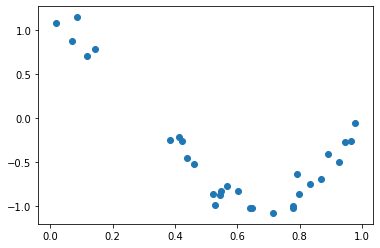

In [24]:
plt.scatter(X, y)


 Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.41입니다.

 Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE는 0.04입니다.

 Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.32입니다.


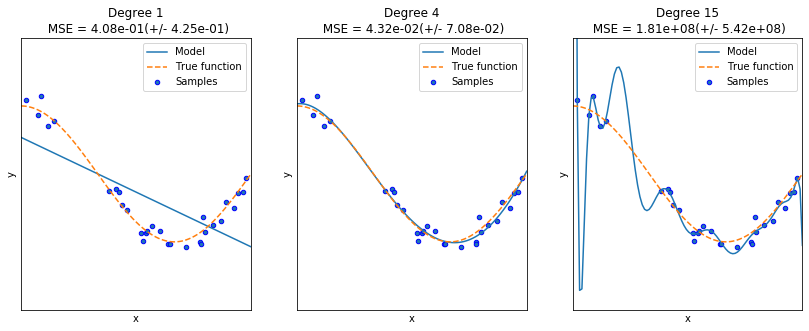

In [23]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features), 
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\n Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients), 2))
  print('Degree {0} MSE는 {1:.2f}입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행함
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
  plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

편향-분산 트레이드 오프(Bias-Variance Trade off)
- 편향이 높으면 분산이 낮아지고, 분산이 높으면 편향이 낮아짐
  - Underfit : High Bias - Low Variance
  - Trade off- fit : Medium Bias - Medium Variance
  - Overfit : Low Bias - High variance